<a href="https://colab.research.google.com/github/100495982/ML_G84_Grupo2/blob/isa/primera_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera Práctica**

**Autores:**


---


Luis Enrique Valero Montero - Gr. 85 - 100495982

Isabelle Borgstedt - Gr. 84 - 100559990

# EDA Simplificado

Things to add to the EDA:
- Distribution graphs
- Outlier detection and analysis
- Covariance
- Median, min, max, and average of important attributes

We can always keep adding more to this later.

In [20]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv("attrition_availabledata_09.csv")

# ¿Cuántas variables e instancias hay?
print("Hay " + str(df.shape[0]) + " instancias y " + str(df.shape[1]) + " variables.")
print("-------------------------------------------------------------------------------------------------------------------------------------")

# ¿Qué variables son categóricas/ordinales/númericas?
cat_var = df.select_dtypes(include=['object']).columns.tolist()

def ordinales_o_numericas(df, threshold=5):
  num_var = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
  ord_var = []

  for col in num_var:
    unique_values = df[col].nunique()
    if unique_values <= threshold:
      ord_var.append(col)
    num_var = [x for x in num_var if x not in ord_var]
  return num_var, ord_var

print("Variables categóricas: ", cat_var)
print("Variables ordinales: ", ordinales_o_numericas(df)[1])
print("Variables numéricas: ", ordinales_o_numericas(df)[0])
print("-------------------------------------------------------------------------------------------------------------------------------------")

#corr_matrix = df.corr()
#print("Matriz de correlación: ")
#print(corr_matrix)
#print("-------------------------------------------------------------------------------------------------------------------------------------")


# ¿Hay variables categóricas con alta cardinalidad?
def cardinalidad(df):
  cat_var = df.select_dtypes(include=['object']).columns.tolist()
  cardinalidad = {col: df[col].nunique() for col in cat_var}
  cardinalidad_df = pd.DataFrame(list(cardinalidad.items()), columns=['Variable', 'Unique Values'])
  cardinalidad_df = cardinalidad_df.sort_values(by="Unique Values", ascending=False)
  return cardinalidad_df

print("Variables con alta cardinalidad: ")
cardinalidad_df = cardinalidad(df)
print(cardinalidad_df)
print("-------------------------------------------------------------------------------------------------------------------------------------")


# ¿Qué variables tienen valores faltantes y cuántos?
def faltantes(df):
  datos_faltantes = df.isnull().sum()
  datos_faltantes = datos_faltantes[datos_faltantes > 0]
  faltantes_df = pd.DataFrame({
      "Variable:": datos_faltantes.index,
      "Valores faltantes:": datos_faltantes.values,
      "Porcentaje faltantes:": datos_faltantes.values / len(df) * 100
  })
  faltantes_df = faltantes_df.sort_values(by="Porcentaje faltantes:", ascending=False)
  return faltantes_df

print("Variables con valores faltantes: ")
faltantes_df = faltantes(df)
print(faltantes_df)
print("-------------------------------------------------------------------------------------------------------------------------------------")

# ¿Hay columnas constantes o columnas de ID?
def constantes(df):
  constantes = []
  for col in df.columns:
    if df[col].nunique() == 1:
      constantes.append(col)
  return constantes

print("Columnas constantes: ", constantes(df))

def id(df):
  id_cols = []
  for col in df.columns:
    if df[col].nunique() == len(df):
      id_cols.append(col)
  return id_cols

print("Columnas de ID: ", id(df))
print("-------------------------------------------------------------------------------------------------------------------------------------")


# ¿Se trata de un problema de regresión o clasificación?
print("Se trata de un problema de clasificación porque el attributo'Attrition' tiene dos posibles valores categoricos discretos: Sí o No.")
print("-------------------------------------------------------------------------------------------------------------------------------------")


# Si es clasificación, ¿está desbalanceado?
print(df["Attrition"].value_counts(normalize=True))
print("Está desbalanceado.")
print("-------------------------------------------------------------------------------------------------------------------------------------")


# Definir variables numéricas
numerical_vars, ordinal_vars = ordinales_o_numericas(df)

print("Estadísticas descriptivas para las variables numéricas:")
df_num_desc = df[numerical_vars].describe().transpose().round(2)  # Transpose for readability & round to 2 decimals
df_num_desc.insert(0, "Variable", df_num_desc.index)  # Add column for variable names
print(tabulate(df_num_desc, headers='keys', tablefmt='pretty', showindex=False))  # Print as a formatted table


print("Análisis descriptivo para las variables categóricas:")
for col in cat_var:
    print(f"\nDistribución de {col}:")
    df_cat = df[col].value_counts(normalize=True).mul(100).round(2).reset_index()  # Round to 2 decimal places
    df_cat.columns = [col, 'Percentage']
    print(tabulate(df_cat, headers='keys', tablefmt='pretty', showindex=False))


Hay 2940 instancias y 31 variables.
-------------------------------------------------------------------------------------------------------------------------------------
Variables categóricas:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables ordinales:  ['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Education', 'EmployeeCount', 'JobLevel', 'StandardHours', 'StockOptionLevel']
Variables numéricas:  ['hrs', 'absences', 'Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
-------------------------------------------------------------------------------------------------------------------------------------
Variables con alta cardinalidad: 
         Variable  Unique Values
4         JobRole            

Vamos a encontrar "outliers" para determinar las mejores opciones para escalado y imputación.

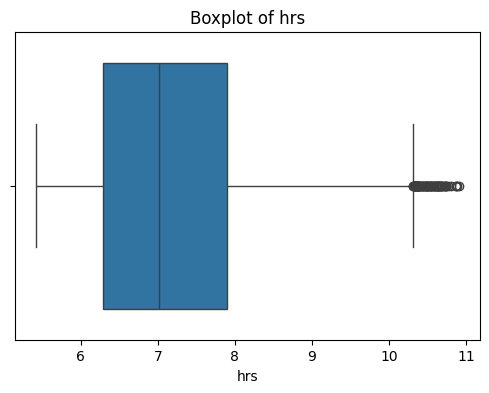

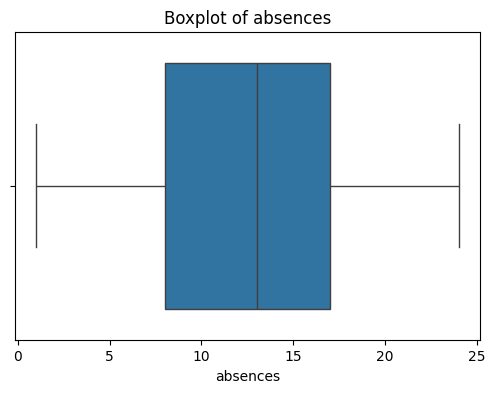

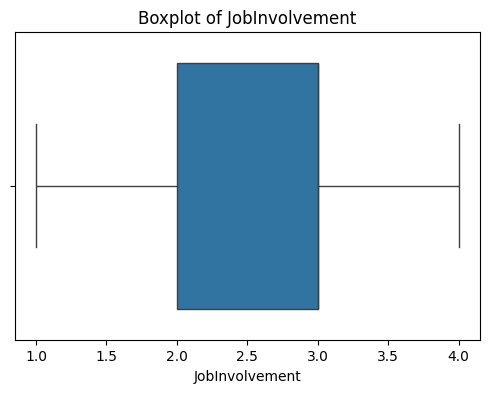

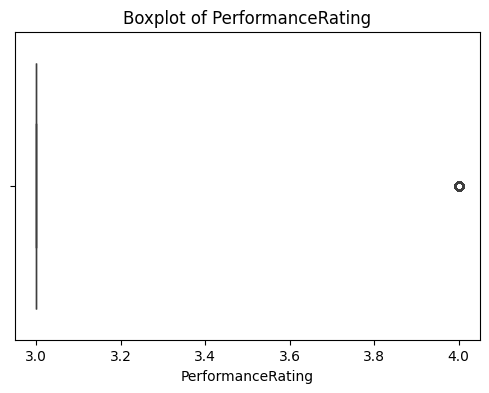

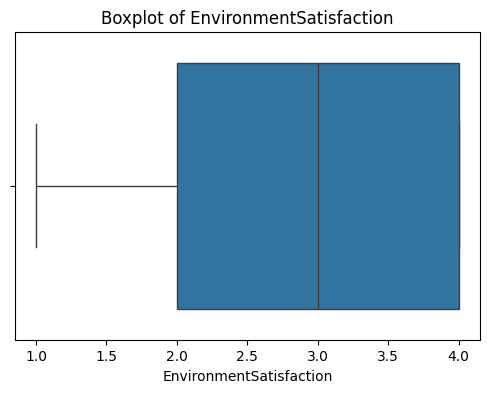

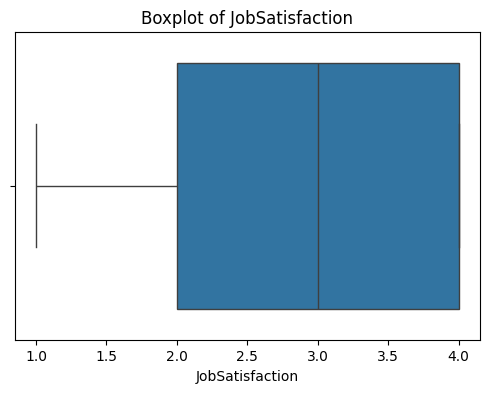

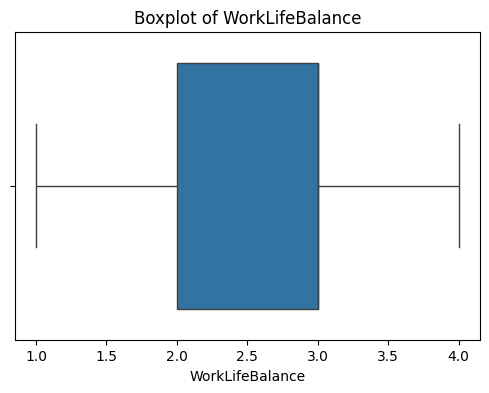

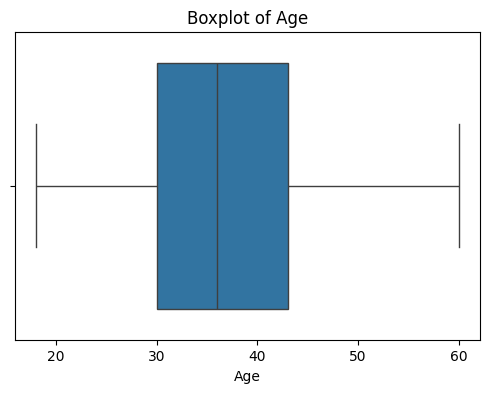

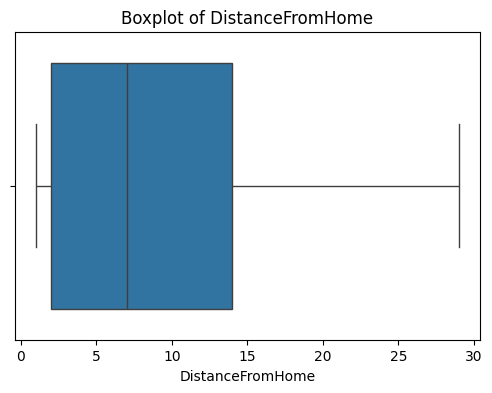

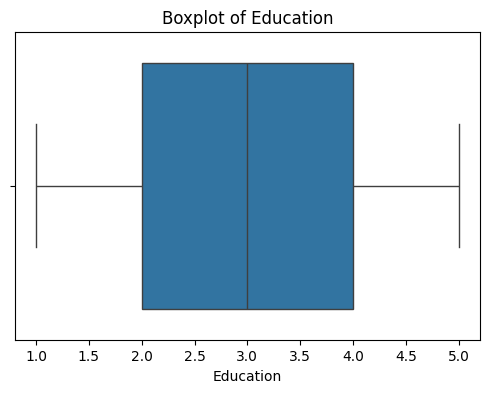

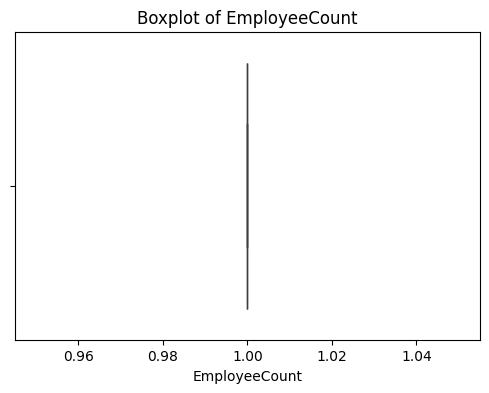

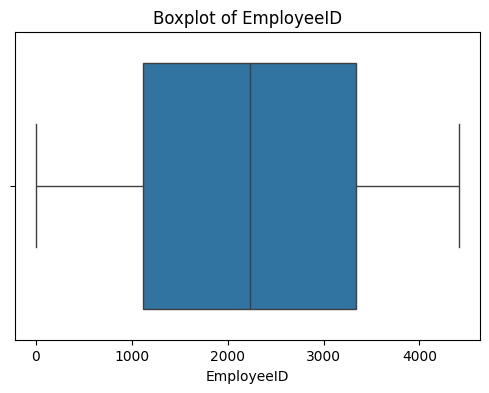

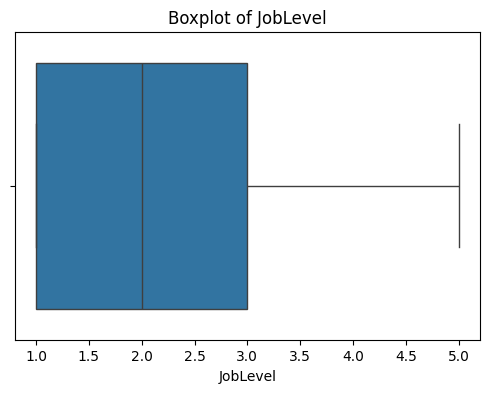

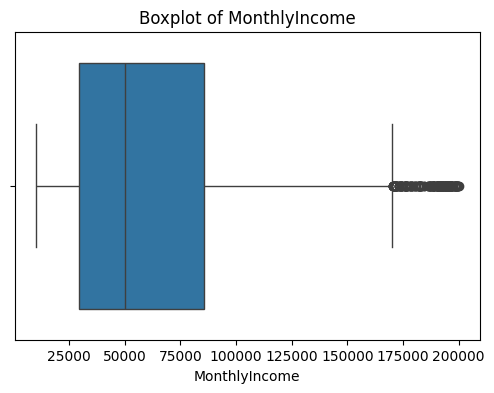

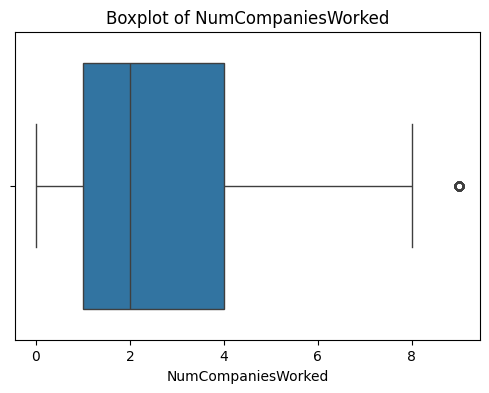

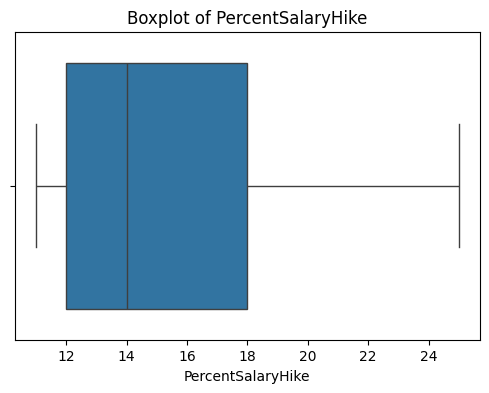

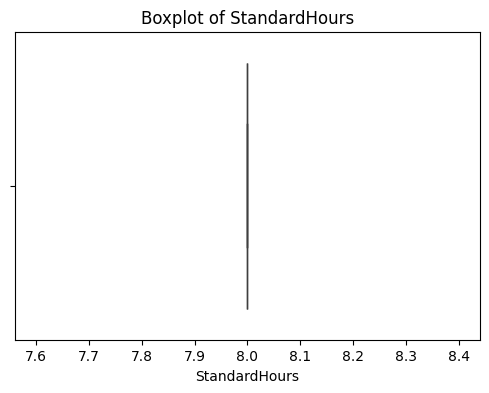

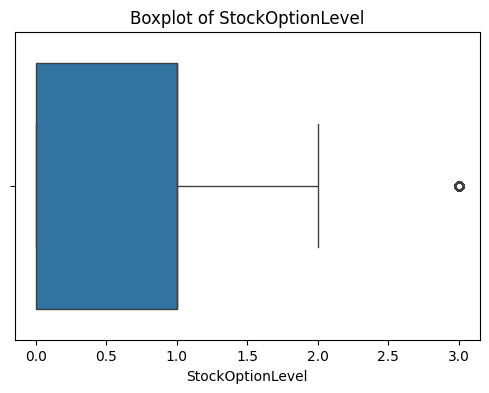

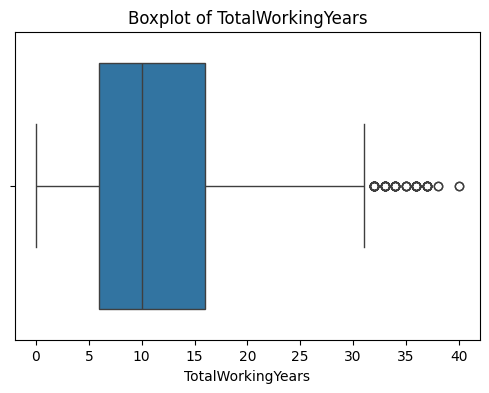

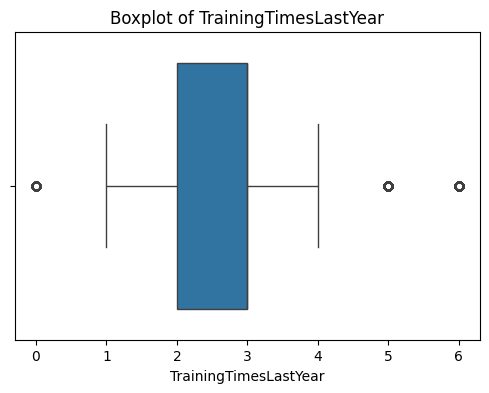

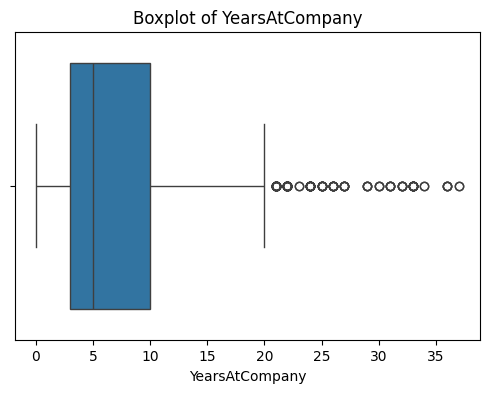

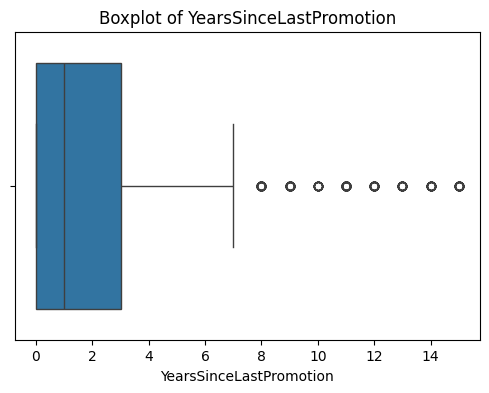

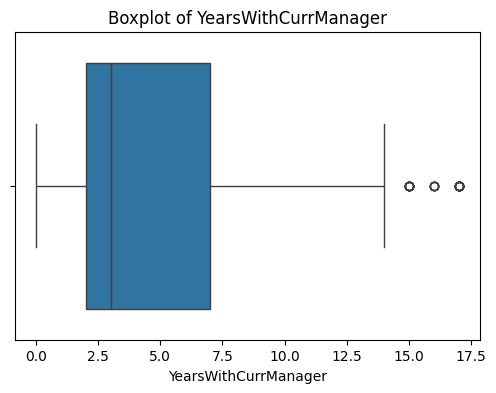


Outliers using Z-Score:
                   Column  Outlier Index   Z-Score
0       TotalWorkingYears             50  3.248904
1       TotalWorkingYears            185  3.122043
2       TotalWorkingYears            248  3.122043
3       TotalWorkingYears            292  3.122043
4       TotalWorkingYears            386  3.122043
..                    ...            ...       ...
168  YearsWithCurrManager           2293  3.554717
169  YearsWithCurrManager           2414  3.554717
170  YearsWithCurrManager           2424  3.554717
171  YearsWithCurrManager           2583  3.001849
172  YearsWithCurrManager           2731  3.001849

[173 rows x 3 columns]

Outliers using IQR Method:
                    Column  Outlier Index  IQR Method
0                      hrs             12   10.666170
1                      hrs             25   10.389476
2                      hrs             51   10.433987
3                      hrs             64   10.907255
4                      hrs            214

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 1️⃣ Visualizing Outliers with Boxplots
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns  # Get numerical columns
    for col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

# 2️⃣ Detecting Outliers using Z-Score
def zscore_outliers(df, threshold=3):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_list = []  # Store outliers in a list

    for col in numerical_cols:
        z_scores = zscore(df[col].dropna())  # Calculate Z-scores
        outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
        outlier_values = df[col].iloc[outlier_indices]
        for idx, value in zip(outlier_indices, outlier_values):
            outliers_list.append({"Column": col, "Outlier Index": idx, "Z-Score": z_scores[idx]})

    outliers = pd.DataFrame(outliers_list)
    return outliers

# 3️⃣ Detecting Outliers using IQR (Interquartile Range)
def iqr_outliers(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_list = []  # Store outliers in a list

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_values = df[col].loc[outlier_indices]

        for idx, value in zip(outlier_indices, outlier_values):
            outliers_list.append({"Column": col, "Outlier Index": idx, "IQR Method": value})

    outliers = pd.DataFrame(outliers_list)
    return outliers

# Example usage
# Assuming df is your DataFrame

# Visualize outliers using boxplots
plot_boxplots(df)

# Find outliers using Z-Score
outliers_zscore = zscore_outliers(df)
print("\nOutliers using Z-Score:")
print(outliers_zscore)

# Find outliers using IQR Method
outliers_iqr = iqr_outliers(df)
print("\nOutliers using IQR Method:")
print(outliers_iqr)


# Evaluacion de Rendimiento Futuro

Aquí estamos separando los datos con Holdout: 2/3 train y 1/3 test. Debemos garantizar que los datos para "test" solo son usados para el rendimiento final.

Es importante que mantengamos el balance cuando dividimos los datos: 83.9% "no" y 16.1% "yes".

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

# Defining target variable and features
target = "Attrition"
X = df.drop(columns=[target])
y = df[target]

# Convert categorical variables into numerical values using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)  # Avoids multicollinearity by dropping one category per feature

# Perform the outer train-test split (stratify to maintain class proportions)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=1/3, stratify=y, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Evaluation Function (defined but not used yet)
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a model using Balanced Accuracy, TPR, TNR, and a confusion matrix.
    """
    y_pred = model.predict(X_test)  # Get predictions

    # Compute metrics
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    overall_acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Extract TPR (Sensitivity) and TNR (Specificity)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)  # Sensitivity (Recall for positive class)
    tnr = tn / (tn + fp)  # Specificity

    # Print results
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Overall Accuracy: {overall_acc:.4f}")
    print(f"True Positive Rate (TPR): {tpr:.4f}")
    print(f"True Negative Rate (TNR): {tnr:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training set: (1960, 43), Test set: (980, 43)


# Metodos Basicos: KNN y Trees

KNN:

Trees:

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)  # Model is trained here

# Evaluate the trained model
evaluate_model(model, X_test, y_test)  # Now we use the function from Step 3

Balanced Accuracy: 0.7892
Overall Accuracy: 0.8908
True Positive Rate (TPR): 0.6392
True Negative Rate (TNR): 0.9392

Confusion Matrix:
[[772  50]
 [ 57 101]]

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.94      0.94       822
         Yes       0.67      0.64      0.65       158

    accuracy                           0.89       980
   macro avg       0.80      0.79      0.79       980
weighted avg       0.89      0.89      0.89       980



Esta matrix de confusión muestra "overall accuracy" TPR y TNR. Es claro que "overall accuracy" es engañoso en este caso porque tenemos datos desbalanceados. Sin embargo, podemos ver que "balanced accuracy" provee una una fórmula más representativa porque da el mismo peso a los dos categorías de "attrition". Podemos notar la diferencia entre los porcentajes de TPR y TNR. Los datos demuestran que el rendimiento del modelo es mucho mejor para los casos de "No" que los casos de "Yes".



Métodos de escalado y imputación:

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Step 1: Impute Missing Numerical Values
num_imputer = SimpleImputer(strategy="median")  # Impute with median
X_encoded.iloc[:, :] = num_imputer.fit_transform(X_encoded)  # Apply imputation

# Step 2: Apply Scaling
scaler = RobustScaler()  # Use RobustScaler, or StandardScaler if appropriate
X_scaled = scaler.fit_transform(X_encoded)  # Scale the features

# Convert back to DataFrame after scaling
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Step 3: Train/Test Split (You already performed this, but here it is again for clarity)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1/3, stratify=y, random_state=42)

# Step 4: Train the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)  # Train the model using the scaled and imputed training data

# Step 5: Evaluate the Model
evaluate_model(model, X_test, y_test)  # Evaluate the trained model using the scaled test data


Balanced Accuracy: 0.7903
Overall Accuracy: 0.8755
True Positive Rate (TPR): 0.6646
True Negative Rate (TNR): 0.9161

Confusion Matrix:
[[753  69]
 [ 53 105]]

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.92      0.93       822
         Yes       0.60      0.66      0.63       158

    accuracy                           0.88       980
   macro avg       0.77      0.79      0.78       980
weighted avg       0.88      0.88      0.88       980



# Modelos Lineales y SVMs

# Resultados y Modelo Final

# Tarea de Eleccion Abierta